# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Kevin Robert Siswoyo
- **Email:** kevin.siswoyo28@gmail.com
- **ID Dicoding:** kevinrob28

## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi customer dan seller pada setiap wilayah?
- Kota manakah yang memiliki tingkat kecenderungan yang lebih tinggi untuk membayar menggunakan metode kartu kredit?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import unidecode
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


## Data Wrangling

### Gathering Data

Load customer data

In [2]:
df_customers = pd.read_csv('./customers_dataset.csv',delimiter = ',')
df_customers.head(10)



,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG


Load geolocation data

In [3]:
df_geo = pd.read_csv('./geolocation_dataset.csv', delimiter=',')
df_geo.head(10)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP
8,1029,-23.543769,-46.634278,sao paulo,SP
9,1011,-23.547640,-46.636032,sao paulo,SP


Load order items data

In [4]:
df_order_items = pd.read_csv('./order_items_dataset.csv', delimiter= ',')
df_order_items.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


Load order payments

In [5]:
df_order_payments = pd.read_csv('./order_payments_dataset.csv', delimiter=',')
df_order_payments.head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
8,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95


Load order reviews

In [6]:
df_order_reviews = pd.read_csv('./order_reviews_dataset.csv',delimiter=',')
df_order_reviews.head(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14 00:00:00,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,2017-05-17 00:00:00,2017-05-18 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47


Load orders data

In [7]:
df_orders = pd.read_csv('./orders_dataset.csv',delimiter=',')
df_orders.head(10)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


Load product category data

In [8]:
df_product_category = pd.read_csv('./product_category_name_translation.csv',delimiter=',')
df_product_category.head(10)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
5,esporte_lazer,sports_leisure
6,perfumaria,perfumery
7,utilidades_domesticas,housewares
8,telefonia,telephony
9,relogios_presentes,watches_gifts


Load products data

In [9]:
df_products = pd.read_csv('./products_dataset.csv', delimiter = ',')
df_products.head(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.0,1156.0,1.0,600.0,17.0,10.0,12.0


Load sellers data

In [10]:
df_sellers = pd.read_csv('./sellers_dataset.csv', delimiter =',')
df_sellers.head(10)


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
5,c240c4061717ac1806ae6ee72be3533b,20920,rio de janeiro,RJ
6,e49c26c3edfa46d227d5121a6b6e4d37,55325,brejao,PE
7,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP
8,768a86e36ad6aae3d03ee3c6433d61df,1529,sao paulo,SP
9,ccc4bbb5f32a6ab2b7066a4130f114e3,80310,curitiba,PR


**Insight:**
- Semua datasets berhasil di load menggunakan .read_csv() dan menambahkan delimiter ","

### Assessing Data

Assess customer data

In [11]:
df_customers.info()

na = df_customers.isna().sum()
print('Jumlah NA values: ', na)

dup = df_customers.duplicated().sum()
print('Jumlah duplikasi: ', dup)

df_customers.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
Jumlah NA values:  customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
Jumlah duplikasi:  0


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Assess geolocation data

In [12]:
df_geo.info()

na = df_geo.isna().sum()
print('Jumlah NA values: ', na)

dup = df_geo.duplicated().sum()
print('Jumlah duplikasi: ', dup)

df_geo.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
Jumlah NA values:  geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


Assess order items

In [13]:
df_order_items.info()

na = df_order_items.isna().sum()
print('Jumlah NA values: ', na)

dup = df_order_items.duplicated().sum()
print('Jumlah duplikasi: ', dup)

df_order_items.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
Jumlah NA values:  order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
Jumlah duplikasi:  0


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


Assess order payments

In [14]:
df_order_payments.info()

na = df_order_payments.isna().sum()
print('Jumlah NA values: ', na)

dup = df_order_payments.duplicated().sum()
print('Jumlah duplikasi: ', dup)

df_order_payments.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
Jumlah NA values:  order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
Jumlah duplikasi:  0


,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


Assess order reviews

In [15]:
df_order_reviews.info()

na = df_order_reviews.isna().sum()
print('Jumlah NA values: ', na)

dup = df_order_reviews.duplicated().sum()
print('Jumlah duplikasi: ', dup)

df_order_reviews.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
Jumlah NA values:  review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64
Jumlah duplikasi:  0


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,08528f70f579f0c830189efc523d2182,df56136b8031ecd28e200bb18e6ddb2e,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


Assess orders

In [16]:
df_orders.info()

na = df_orders.isna().sum()
print('Jumlah NA values: ', na)

dup = df_orders.duplicated().sum()
print('Jumlah duplikasi: ', dup)

df_orders.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
Jumlah NA values:  order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Assess product category

In [17]:
df_product_category.info()

na = df_product_category.isna().sum()
print('Jumlah NA values: ', na)

dup = df_product_category.duplicated().sum()
print('Jumlah duplikasi: ', dup)

df_product_category.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
Jumlah NA values:  product_category_name            0
product_category_name_english    0
dtype: int64
Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


Assess product

In [18]:
df_products.info()

na = df_products.isna().sum()
print('Jumlah NA values: ', na)

dup = df_products.duplicated().sum()
print('Jumlah duplikasi: ', dup)

df_products.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
Jumlah NA values:  product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g        

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,106392145fca363410d287a815be6de4,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


Assess sellers

In [19]:
df_sellers.info()

na = df_sellers.isna().sum()
print('Jumlah NA values: ', na)

dup = df_sellers.duplicated().sum()
print('Jumlah duplikasi: ', dup)

df_sellers.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
Jumlah NA values:  seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64
Jumlah duplikasi:  0


,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,9e25199f6ef7e7c347120ff175652c3b,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


**Insight:**
- df_customers -> tidak ada masalah
- df_geolocation -> terdapat 261831 data duplikasi, terdapat data yang tidak konsisten pada column geolocation_city
- df_order_items -> kesalahan tipe untuk shipping_limit_date
- df_order_payments -> tidak ada masalah
- df_order_reviews ->
    - terdapat missing value untuk:
        - review_comment_title       87656
        - review_comment_message     58247
    - terdapat kesalahan tipe untuk:
        - review_creation_date
        - review_answer_timestamp
- df_orders->
  - kesalahan tipe untuk
      - order_purchase_timestamp
      - order_approved_at
      - order_delivered_carrier_date
      - order_delivered_customer_date
      - order_estimated_delivery_date
  - terdapat missing value pada:
      - order_approved_at        160
      - order_delivered_carrier_date     1783
      - order_delivered_customer_date    2965
- df_product_category -> tidak ada masalah
- df_products -> terdapat missing value pada:
      - product_category_name         610
      - product_name_lenght           610
      - product_description_lenght    610
      - product_photos_qty            610
      - product_weight_g                2
      - product_length_cm               2
      - product_height_cm               2
      - product_width_cm                2
- df_sellers -> tidak ada masalah

### Cleaning Data

Membershkan geolocation data

In [20]:
# menghilangkan duplikasi
dup = df_geo.duplicated().sum()
print('duplicated values: ', dup)

drop_dup = df_geo.drop_duplicates(inplace=True)
print('duplicated values update: ', df_geo.duplicated().sum())

df_geo.info()


duplicated values:  261831
duplicated values update:  0
<class 'pandas.core.frame.DataFrame'>
Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geolocation_city             738332 non-null  object 
 4   geolocation_state            738332 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 33.8+ MB


Membersihkan order items

In [21]:
#memperbaiki tipe data

df_order_items['shipping_limit_date'] = pd.to_datetime(df_order_items['shipping_limit_date'])
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


Membersihkan order reviews

In [22]:
# menangani missing value
df_order_reviews['review_comment_title'] = df_order_reviews['review_comment_title'].fillna('No Title')
df_order_reviews['review_comment_message'] = df_order_reviews['review_comment_message'].fillna('No Comment')

df_order_reviews.isna().sum()


# memperbaiki tipe data

df_order_reviews['review_creation_date'] = pd.to_datetime(df_order_reviews['review_creation_date'])
df_order_reviews['review_answer_timestamp'] = pd.to_datetime(df_order_reviews['review_answer_timestamp'])
df_order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


Membersihkan orders

In [23]:
# memperbaiki tipe data
cols = ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']

for col in cols:
  df_orders[col]= pd.to_datetime(df_orders[col])


# menghilangkan missing values
df_orders.dropna(inplace=True)

df_orders.info()


<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


Membersihkan products

In [24]:
# menghilangkan missing values
df_products.dropna(inplace=True)
df_products.info()


<class 'pandas.core.frame.DataFrame'>
Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


**Insight:**
- df_customers -> tidak dilakukan data cleaning
- df_geolocation -> terdapat 261831 data duplikasi telah di drop duplicates
- df_order_items -> kesalahan tipe untuk shipping_limit_date telah diubah tipe data
- df_order_payments -> tidak dilakukan data cleaning
- df_order_reviews ->
    - terdapat missing value telah di drop na:
        - review_comment_title       87656
        - review_comment_message     58247
    - terdapat kesalahan tipe telah diubah tipe data:
        - review_creation_date
        - review_answer_timestamp
        
- df_orders->
  - kesalahan tipe telah diubah tipe datanya
      - order_purchase_timestamp
      - order_approved_at
      - order_delivered_carrier_date
      - order_delivered_customer_date
      - order_estimated_delivery_date
  - terdapat missing value telah di drop na
      - order_approved_at        160
      - order_delivered_carrier_date     1783
      - order_delivered_customer_date    2965
- df_product_category -> tidak dilakukan data cleaning
- df_products -> terdapat missing value telah di drop na
      - product_category_name         610
      - product_name_lenght           610
      - product_description_lenght    610
      - product_photos_qty            610
      - product_weight_g                2
      - product_length_cm               2
      - product_height_cm               2
      - product_width_cm                2
- df_sellers -> tidak ada masalah

## Exploratory Data Analysis (EDA)

### Explore ...

**EDA Pertanyaan 1**

In [25]:
cus_geo_df = df_customers.merge(
    df_geo,
    left_on= 'customer_zip_code_prefix',
    right_on = 'geolocation_zip_code_prefix',
    how = 'inner'
)

In [26]:
cus_geo_df['geolocation_city'] = cus_geo_df['geolocation_city'].str.lower().apply(unidecode.unidecode)
cus_geo_df['geolocation_state'] = cus_geo_df['geolocation_state'].str.lower()

print('Total missing values: ',cus_geo_df.isna().sum())
print('Total duplicated values: ',cus_geo_df.duplicated().sum())

cus_geo_df = cus_geo_df.drop_duplicates()
print('Total duplicated values update: ', cus_geo_df.duplicated().sum())
cus_geo_df.info()

Total missing values:  customer_id                    0
customer_unique_id             0
customer_zip_code_prefix       0
customer_city                  0
customer_state                 0
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
Total duplicated values:  251950
Total duplicated values update:  0
<class 'pandas.core.frame.DataFrame'>
Index: 10075778 entries, 0 to 10327727
Data columns (total 10 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   customer_id                  object 
 1   customer_unique_id           object 
 2   customer_zip_code_prefix     int64  
 3   customer_city                object 
 4   customer_state               object 
 5   geolocation_zip_code_prefix  int64  
 6   geolocation_lat              float64
 7   geolocation_lng              float64
 8   geolocation_city             ob

In [27]:
cust_geo_counts = (
    cus_geo_df.groupby(['geolocation_state', 'geolocation_city'], as_index=False)
    .agg(
        customer_count=('customer_id', 'count'),
        geolocation_lat=('geolocation_lat', 'mean'),
        geolocation_lng=('geolocation_lng', 'mean')
    )
)

print(cust_geo_counts)

     geolocation_state         geolocation_city  customer_count  \
0                   ac                brasileia              11   
1                   ac          cruzeiro do sul             261   
2                   ac           epitaciolandia              10   
3                   ac            manoel urbano               7   
4                   ac               porto acre               3   
...                ...                      ...             ...   
4409                to             silvanopolis               8   
4410                to  sitio novo do tocantins               8   
4411                to               taguatinga              57   
4412                to           tocantinopolis             392   
4413                to                  xambioa              63   

      geolocation_lat  geolocation_lng  
0          -11.006782       -68.748803  
1           -7.626290       -72.668821  
2          -11.019626       -68.727349  
3           -8.838578       -69

In [28]:
seller_geo_df = df_sellers.merge(
    df_geo,
    left_on= 'seller_zip_code_prefix',
    right_on = 'geolocation_zip_code_prefix',
    how = 'inner'
)

In [29]:
seller_geo_df['geolocation_city'] = seller_geo_df['geolocation_city'].str.lower().apply(unidecode.unidecode)
seller_geo_df['geolocation_state'] = seller_geo_df['geolocation_state'].str.lower()

print('Total missing values: ',seller_geo_df.isna().sum())
print('Total duplicated values: ',seller_geo_df.duplicated().sum())

seller_geo_df = seller_geo_df.drop_duplicates()
print('Total duplicated values update: ', seller_geo_df.duplicated().sum())
seller_geo_df.info()

Total missing values:  seller_id                      0
seller_zip_code_prefix         0
seller_city                    0
seller_state                   0
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
Total duplicated values:  7766
Total duplicated values update:  0
<class 'pandas.core.frame.DataFrame'>
Index: 304023 entries, 0 to 311788
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   seller_id                    304023 non-null  object 
 1   seller_zip_code_prefix       304023 non-null  int64  
 2   seller_city                  304023 non-null  object 
 3   seller_state                 304023 non-null  object 
 4   geolocation_zip_code_prefix  304023 non-null  int64  
 5   geolocation_lat              304023 non-null  float64
 6   geolocation_lng    

In [30]:
seller_geo_counts = (
    seller_geo_df.groupby(['geolocation_state', 'geolocation_city'], as_index=False)
    .agg(
        seller_count=('seller_id', 'count'),
        geolocation_lat=('geolocation_lat', 'mean'),
        geolocation_lng=('geolocation_lng', 'mean')
    )
)

print(seller_geo_counts)

    geolocation_state        geolocation_city  seller_count  geolocation_lat  \
0                  ac              rio branco           111        -9.966664   
1                  am                  manaus            16        -3.128828   
2                  ba         arraial d ajuda             5       -16.490872   
3                  ba         arraial d'ajuda            56       -16.359450   
4                  ba              barro alto            11       -11.769488   
..                ...                     ...           ...              ...   
583                sp  vargem grande paulista           340       -23.622338   
584                sp         varzea paulista            47       -23.218821   
585                sp               vera cruz            56       -22.222338   
586                sp              votorantim           463       -23.541155   
587                sp             votuporanga           485       -20.419309   

     geolocation_lng  
0         -67.81

**EDA Pertanyaan 2**

In [31]:
df_geo['geolocation_city'] = df_geo['geolocation_city'].str.lower().apply(unidecode.unidecode)
df_geo['geolocation_state'] = df_geo['geolocation_state'].str.lower()
cust_geo_merge = df_customers.merge(
    df_geo,
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='left'
)

cust_orders_merge = cust_geo_merge.merge(
    df_orders,
    left_on='customer_id',
    right_on = 'customer_id',
    how='inner'
    )
cust_orders_payments_merge = cust_orders_merge.merge(
    df_order_payments,
    left_on = 'order_id',
    right_on='order_id',
    how='inner')

In [32]:
installment_data = cust_orders_payments_merge[cust_orders_payments_merge['payment_type'] == 'credit_card']

city_installments = installment_data.groupby(['geolocation_state', 'geolocation_city']).agg(
    avg_installments=('payment_installments', 'mean'),
    installment_transactions=('payment_installments', 'size'),
    geolocation_lat=('geolocation_lat', 'mean'),
    geolocation_lng=('geolocation_lng', 'mean')
).reset_index()


city_totals = installment_data.groupby(['geolocation_state', 'geolocation_city']).size().reset_index(name='total_transactions')
city_analysis = city_installments.merge(city_totals, on=['geolocation_state', 'geolocation_city'])
city_analysis['installment_tendency'] = (city_analysis['installment_transactions'] / city_analysis['total_transactions']) * 100




**Insight:**
- Ditemukan data yang masih kurang akurat (setelah cleaning data) pada geolocation city (menggunakan special characters)

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Customers Distribution

In [33]:
cust_geo_counts['log_customer_count'] = np.log1p(cust_geo_counts['customer_count']) #variasi data terlalu luas -> mengurangi dampak outliers


heatmap_data = cust_geo_counts[['geolocation_lat', 'geolocation_lng', 'log_customer_count']].dropna().values.tolist()


map = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)
HeatMap(heatmap_data, radius=10, blur=12).add_to(map)


map

C:\Users\Kevro\AppData\Local\Temp\ipykernel_17068\2370469344.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, x='customer_count', y='geolocation_city', palette='viridis')


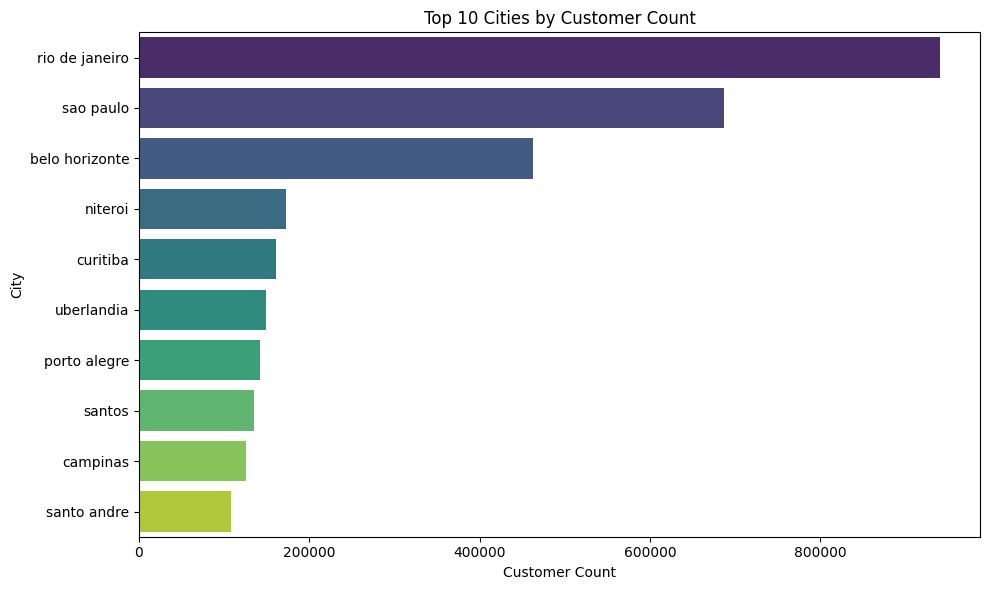

In [34]:
top_cities = cust_geo_counts.groupby(by='geolocation_city').sum().sort_values(by='customer_count', ascending=False).head(10).reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(data=top_cities, x='customer_count', y='geolocation_city', palette='viridis')

plt.title('Top 10 Cities by Customer Count')
plt.xlabel('Customer Count')
plt.ylabel('City')
plt.tight_layout()
plt.show()

C:\Users\Kevro\AppData\Local\Temp\ipykernel_17068\305557875.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, x='customer_count', y='geolocation_city', palette='viridis')


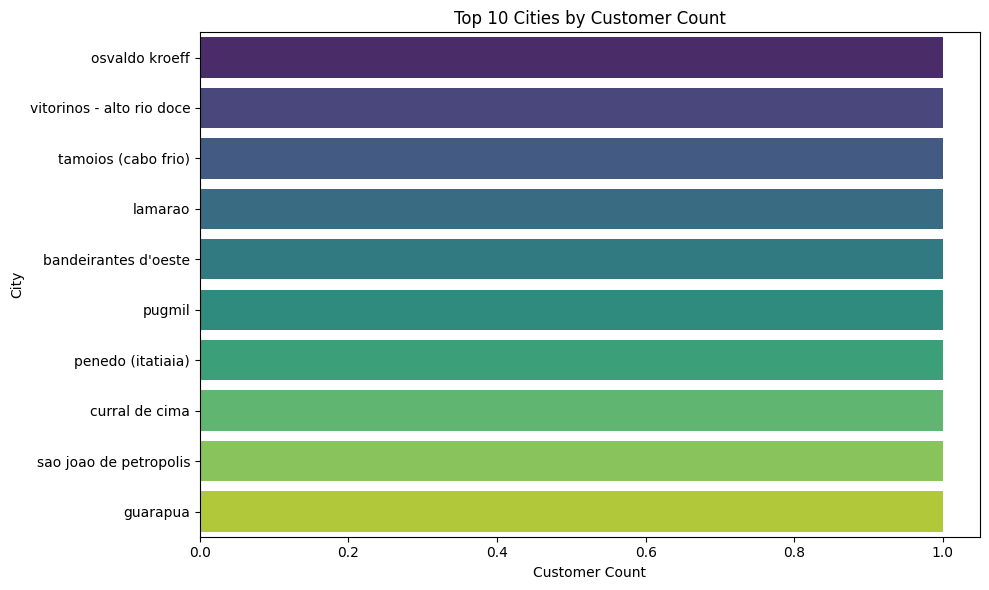

In [35]:


top_cities = cust_geo_counts.groupby(by='geolocation_city').sum().sort_values(by='customer_count', ascending=True).head(10).reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(data=top_cities, x='customer_count', y='geolocation_city', palette='viridis')


plt.title('Top 10 Cities by Customer Count')
plt.xlabel('Customer Count')
plt.ylabel('City')
plt.tight_layout()
plt.show()

Seller Distribution

In [36]:
seller_geo_counts['log_seller_count'] = np.log1p(seller_geo_counts['seller_count']) #variasi data terlalu luas -> mengurangi dampak outliers


heatmap_data = seller_geo_counts[['geolocation_lat', 'geolocation_lng', 'log_seller_count']].dropna().values.tolist()


map = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)
HeatMap(heatmap_data, radius=10, blur=12).add_to(map)
map

C:\Users\Kevro\AppData\Local\Temp\ipykernel_17068\301861149.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, x='seller_count', y='geolocation_city', palette='viridis')


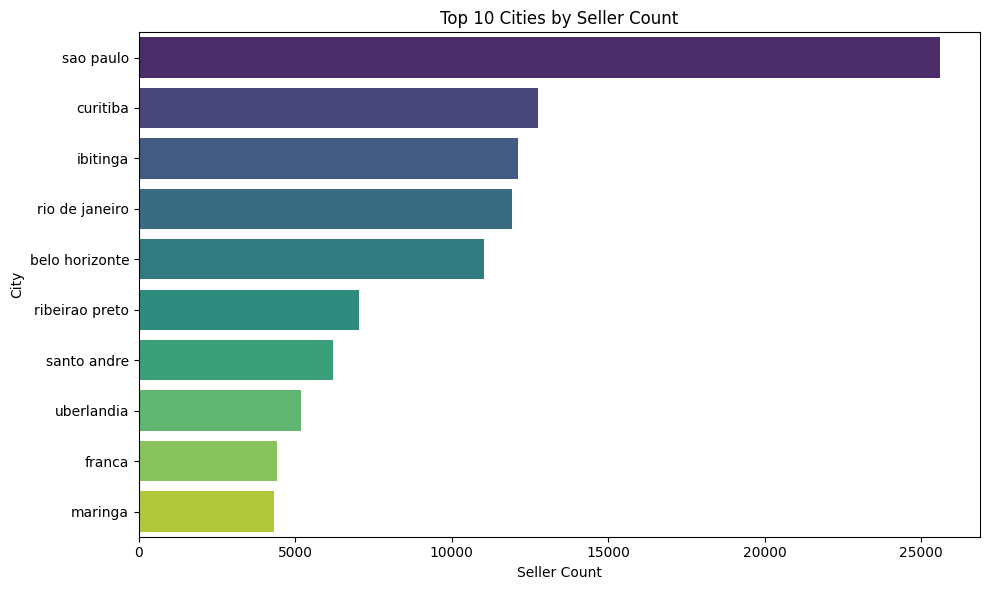

In [37]:
top_cities = seller_geo_counts.groupby(by='geolocation_city').sum().sort_values(by='seller_count', ascending=False).head(10).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=top_cities, x='seller_count', y='geolocation_city', palette='viridis')

plt.title('Top 10 Cities by Seller Count')
plt.xlabel('Seller Count')
plt.ylabel('City')
plt.tight_layout()
plt.show()

### Pertanyaan 2:

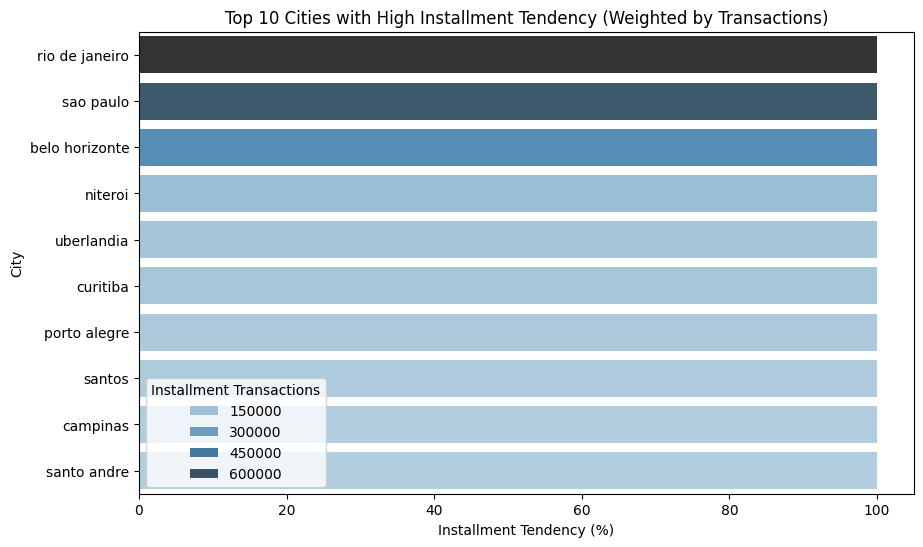

In [38]:
top_cities = city_analysis.sort_values(
    by=['installment_tendency', 'installment_transactions'],
    ascending=[False, False]
).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_cities, x='installment_tendency', y='geolocation_city', hue='installment_transactions', palette='Blues_d')
plt.xlabel('Installment Tendency (%)')
plt.ylabel('City')
plt.title('Top 10 Cities with High Installment Tendency (Weighted by Transactions)')
plt.legend(title='Installment Transactions', loc='lower left')
plt.show()


In [39]:
heatmap_data = city_analysis[['geolocation_lat', 'geolocation_lng', 'installment_tendency']].dropna()


map = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)
HeatMap(heatmap_data.values, radius=10, blur=12, max_zoom=1).add_to(map)

map

**Insight:**
- Pada distribusi customer dan seller, persebarannya dominan pada kota Sao Paulo
- Ditemukan tinggi nya tingkat penggunaan kartu kredit sebagai metode pembayaran

## Analisis Lanjutan (Opsional)

In [40]:
orders_geo = df_orders.merge(
    df_customers[['customer_id', 'customer_zip_code_prefix']],
    on='customer_id',
    how='left'
).merge(
    df_geo[['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state']],
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='left'
)
city_orders = orders_geo.groupby(['geolocation_state', 'geolocation_city']).size().reset_index(name='total_orders')
total_orders = city_orders['total_orders'].sum()
city_orders['percentage'] = (city_orders['total_orders'] / total_orders) * 100
city_orders = city_orders.sort_values(by='total_orders', ascending=False).reset_index(drop=True)
threshold = 1
small_cities = city_orders[city_orders['percentage'] < threshold]
other_percentage = small_cities['percentage'].sum()

city_orders = city_orders[city_orders['percentage'] >= threshold]
others_row = pd.DataFrame([{
    'geolocation_state': 'Others',
    'geolocation_city': 'Others',
    'total_orders': small_cities['total_orders'].sum(),
    'percentage': other_percentage
}])

city_orders = pd.concat([city_orders, others_row], ignore_index=True)


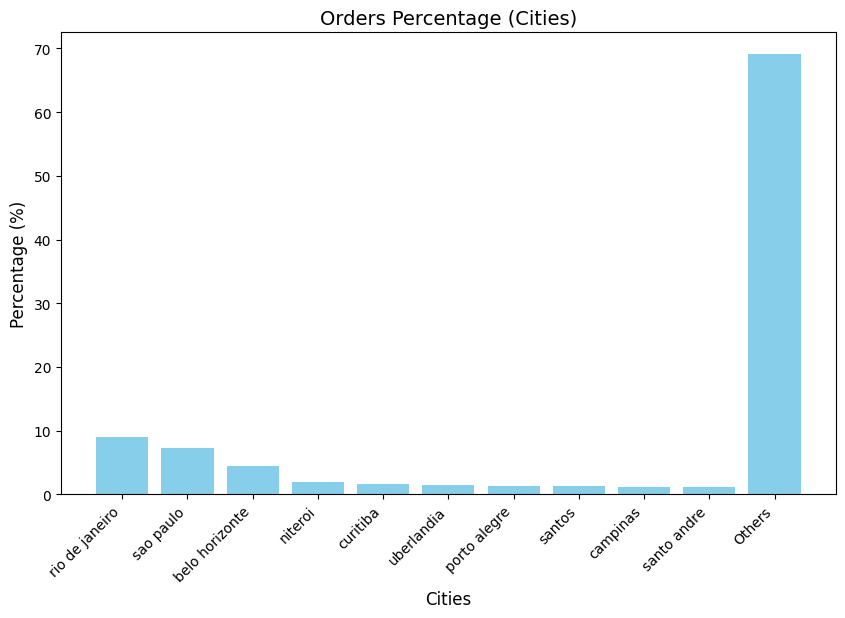

In [41]:

plt.figure(figsize=(10, 6))
plt.bar(city_orders['geolocation_city'], city_orders['percentage'], color='skyblue')
plt.title('Orders Percentage (Cities)', fontsize=14)
plt.xlabel('Cities', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()


## Conclusion

- Conclusion pertanyaan 1
  - Pertanyaan: Bagaimana distribusi customer dan seller pada setiap wilayah?
  - Distribusi customer didominasi pada kota Rio de Janeiro dan Sao Paulo sebagai 2 kota yang memiliki jumlah customer paling banyak dengan jumlah kurang lebih 1500000
  - Distribusi seller yang didapatkan adalah kota sao paulo sebagai kota yang mempunyai seller terbanyak dengan jumlah kurang lebih 25000

- Conclusion pertanyaan 2
  - Pertanyaan: Kota manakah yang memiliki tingkat kecenderungan yang lebih tinggi untuk membayar menggunakan metode kartu kredit?
  - Terdapat minimal 10 kota dengan kecenderungan tinggi menggunakan metode pembayaran kartu kredit dengan kota sao paulo sebagai kota yang memiliki jumlah transaksi menggunakan kartu kredit terbanyak dimana hal ini dapat dimanfaatkan sebagai ide promo untuk pembayaran menggunakan kartu kredit dengan menggandeng mitra perbankan